#######################################
# Made by : Charles Desrosiers-Gagnon #
# Last Update : february 13, 2024     #
#######################################

In [1]:
import numpy as np
%matplotlib inline
#%matplotlib widget
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Import data

In [2]:
#set path
PATH = ""
#open file
df = pd.read_excel(PATH,sheet_name="Donnees")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 88 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   code                                        50 non-null     object 
 1   groups                                      50 non-null     int64  
 2   match                                       50 non-null     int64  
 3   sup                                         50 non-null     int64  
 4   Sex(F=0 M=1)                                50 non-null     int64  
 5   sex                                         50 non-null     object 
 6   TC                                          46 non-null     float64
 7   year of birth                               50 non-null     int64  
 8   dif_age                                     45 non-null     float64
 9   age                                         50 non-null     int64  
 10  weight          

Selecting & Cleaning data

In [4]:
# Only select float64 data categories will be kept as data will 50 no-null entry.

workSet = df.select_dtypes(exclude=['object'])

attributes = list(workSet.columns.values) # trunk manualy the attibute list to select the relevant ones 

In [5]:
workSet = workSet[['groups','Sex(F=0 M=1)','year of birth','age','weight','height','HTP','dyslipie','DIABETE','Pacemaker(Y=1)','Defibrilateur','LVEF_rest','NYHA',
                   'lasix_dose_day_mg','sprironolactone_dose_day_mg',
                    'BCC_dose_day_mg','ARNi_dose_day_mg', 'AntiPlaq_dose_day_mg','AntiCoag_dose_day_mg',
                    'Statine_dose_day_mg','BB_dose_day_mg','VO2_repos','VO2_max', '%_VO2_maxKg','VE_repos',
                    'VE_max','FC_repos','Fcmax','pente_VEVCO2','BSA','FCr','VO2Kg','ChrInd']]
workSet['AntiPlaq_dose_day_mg'] = workSet['AntiPlaq_dose_day_mg'].fillna(0) # the row with empty value in that case just indicate that the patient did not took that medication

#workSet = workSet[:-1] #drop last row
workSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   groups                       50 non-null     int64  
 1   Sex(F=0 M=1)                 50 non-null     int64  
 2   year of birth                50 non-null     int64  
 3   age                          50 non-null     int64  
 4   weight                       50 non-null     float64
 5   height                       50 non-null     float64
 6   HTP                          50 non-null     int64  
 7   dyslipie                     50 non-null     int64  
 8   DIABETE                      50 non-null     int64  
 9   Pacemaker(Y=1)               50 non-null     int64  
 10  Defibrilateur                50 non-null     int64  
 11  LVEF_rest                    50 non-null     int64  
 12  NYHA                         50 non-null     int64  
 13  lasix_dose_day_mg     

*Note Group 1 = systemic right ventricle || group 0 = systemic left ventricle*

In [6]:
# separate group and the data set
#X = workSet.drop('groups', axis=1)
#y = workSet['groups']
y_sRV = workSet['groups'] == 1
y_sLV = workSet['groups'] == 0


SRV = workSet[workSet['groups'] == 1]
SRV = SRV.drop('groups', axis=1)

SLV = workSet[workSet['groups'] == 0]
SLV = SLV.drop('groups', axis=1)



Standardisation

In [7]:
from sklearn.preprocessing import StandardScaler
srv = StandardScaler().fit_transform(SRV)
srv = pd.DataFrame(srv)

slv = StandardScaler().fit_transform(SLV)
slv = pd.DataFrame(slv)

Principal components analysis

In [8]:
from sklearn.decomposition import PCA
pca_R = PCA(n_components=2)
#pca_x = pca.fit_transform(X)
pca_srv = pca_R.fit_transform(srv)
pca_srv = pd.DataFrame(pca_srv)

pca_L = PCA(n_components=2)
pca_slv = pca_L.fit_transform(slv)
pca_slv = pd.DataFrame(pca_slv)

How much each components explain the variance in this data sets

In [9]:
#sRV
explained_variance_R = pca_R.explained_variance_ratio_
explained_variance_R.sort()
explained_variance_R = explained_variance_R[::-1]

#sLV
explained_variance_L = pca_L.explained_variance_ratio_
explained_variance_L.sort()
explained_variance_L = explained_variance_L[::-1]

In [10]:
# number of components #
import numpy as np
n_pcs= pca_R.components_.shape[0]
# get the index of the most important feature on EACH component i.e. largest absolute value using LIST COMPREHENSION HERE
most_important_R = [np.abs(pca_R.components_[i]).argmax() for i in range(n_pcs)]
most_important_L = [np.abs(pca_L.components_[i]).argmax() for i in range(n_pcs)]
# Get the list of attributes alreaddy establish :
feature_names = ['Sex(F=0 M=1)','year of birth','age','weight','height','HTP','dyslipie','DIABETE','Pacemaker(Y=1)','Defibrilateur','LVEF_rest','NYHA',
                   'lasix_dose_day_mg','sprironolactone_dose_day_mg',
                    'BCC_dose_day_mg','ARNi_dose_day_mg', 'AntiPlaq_dose_day_mg','AntiCoag_dose_day_mg',
                    'Statine_dose_day_mg','BB_dose_day_mg','VO2_repos','VO2_max', '%_VO2_maxKg','VE_repos',
                    'VE_max','FC_repos','Fcmax','pente_VEVCO2','BSA','FCr','VO2Kg','ChrInd']

# get the names
most_important_names_R = [feature_names[most_important_R[i]] for i in range(n_pcs)]
most_important_names_L = [feature_names[most_important_L[i]] for i in range(n_pcs)]

# using LIST COMPREHENSION HERE AGAIN
dic_R = {'PC{}'.format(i+1): most_important_names_R[i] for i in range(n_pcs)}
dic_L = {'PC{}'.format(i+1): most_important_names_L[i] for i in range(n_pcs)}


In [11]:
# make dic a table 
table_R = pd.DataFrame(dic_R.items())
table_L = pd.DataFrame(dic_L.items())
# changing names of colums
table_R = table_R.rename(columns={0: 'Keys', 1: 'Features'})
table_L = table_L.rename(columns={0: 'Keys', 1: 'Features'})
# adding variance to table
explained_variance_R = pd.DataFrame(explained_variance_R)
explained_variance_L = pd.DataFrame(explained_variance_L)

explained_variance_R[0]= explained_variance_R[0].apply(lambda x: format(x, 'f'))
explained_variance_L[0]= explained_variance_L[0].apply(lambda x: format(x, 'f'))

explained_variance_R = explained_variance_R.rename(columns={0: 'Variance'})
explained_variance_L = explained_variance_L.rename(columns={0: 'Variance'})

table_R['Variance'] = explained_variance_R
table_L['Variance'] = explained_variance_L 

*Adding group labelling back*

In [13]:
table_features_R = list(table_R['Keys'].values)
table_features_L = list(table_L['Keys'].values)

pca_srv.columns = table_features_R
pca_srv['target']=y_sRV

pca_slv.columns = table_features_L
pca_slv['target']=y_sLV


Visualisation

In [14]:
#from mpl_toolkits.mplot3d import Axes3D
# to make an interactive plot
plt.rcParams['figure.figsize'] = [50, 15]
font = {'size'   : 16}

plt.rc('font', **font)

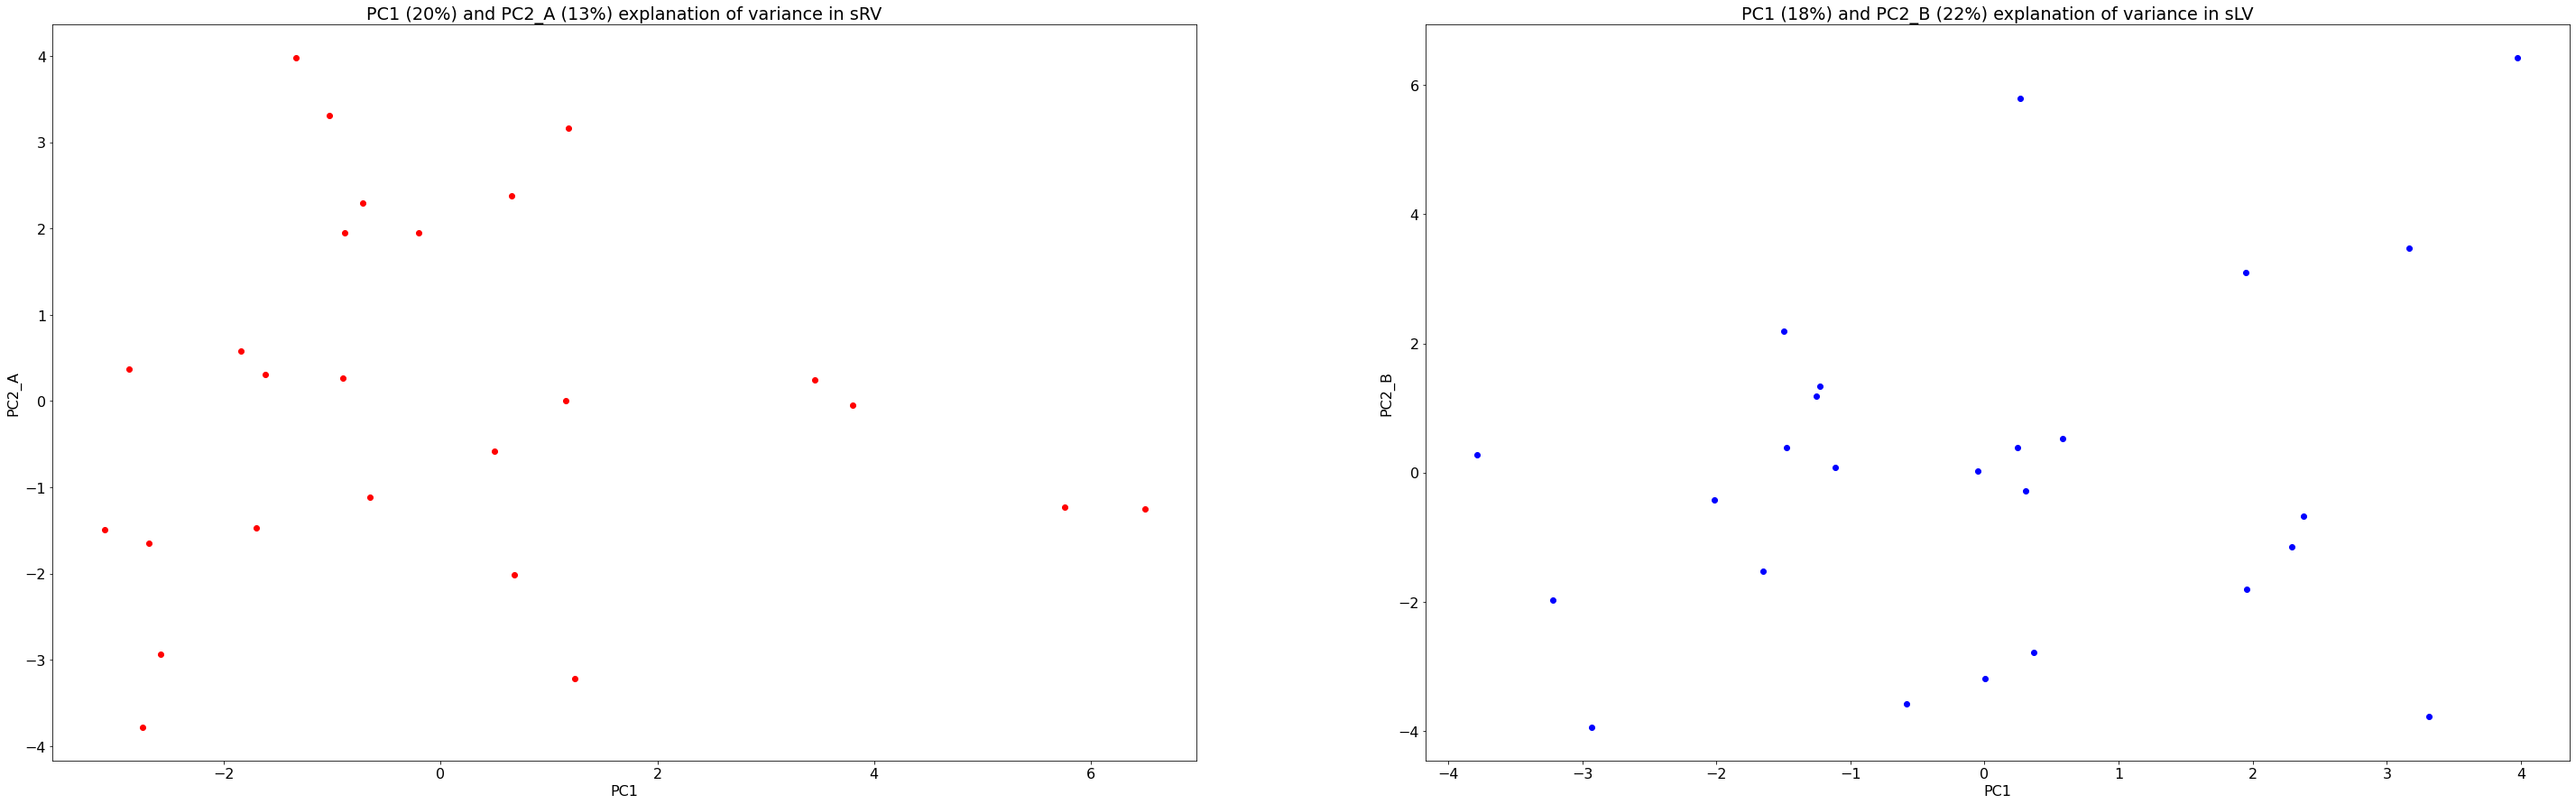

In [33]:
#set plot  pca_x['target']=y
fig = plt.figure()

arrowprops=dict(arrowstyle='->',linewidth=2, shrinkA=0, shrinkB=0)

#Giving a title and names to axes
#fig.suptitle("Difference between patients with a systemic right ventricle and a systemic left ventricle ") 

# # Building the plot
#sRV
plt.subplot(1, 2, 1)
plt.scatter(pca_srv['PC1'], pca_srv['PC2'], color ='r')
plt.title('PC1 (20%) and PC2_A (13%) explanation of variance in sRV')
plt.xlabel('PC1')
plt.ylabel('PC2_A')


#sLV
plt.subplot(1, 2, 2)
plt.scatter(pca_srv['PC2'], pca_slv['PC1'], color ='b')
plt.title('PC1 (18%) and PC2_B (22%) explanation of variance in sLV')
plt.xlabel('PC1')
plt.ylabel('PC2_B')



plt.show()
